# Decision Trees 

Decision Tree is one of the popular and most widely used Machine Learning Algorithms because of its robustness to noise, tolerance against missing information, handling of irrelevant, redundant predictive attribute values, low computational cost, interpretability, fast run time and robust predictors.

Objective         : Notebook focus on training, visualizing, and making predictions with Decision Trees
Dataset           : Iris dataset (widely used for ML model training) with 150 samples.
                    Iris is a type of plant that has 3 main varieties: setosa, virginica and versicolor 
                    The dataset has plant measurements (features) that will be used to predict the plant's type.
                    The features (4): sepal length (cm) and width (cm) ||| petal length (cm) and width (cm)

![iris1.png](iris1.png)
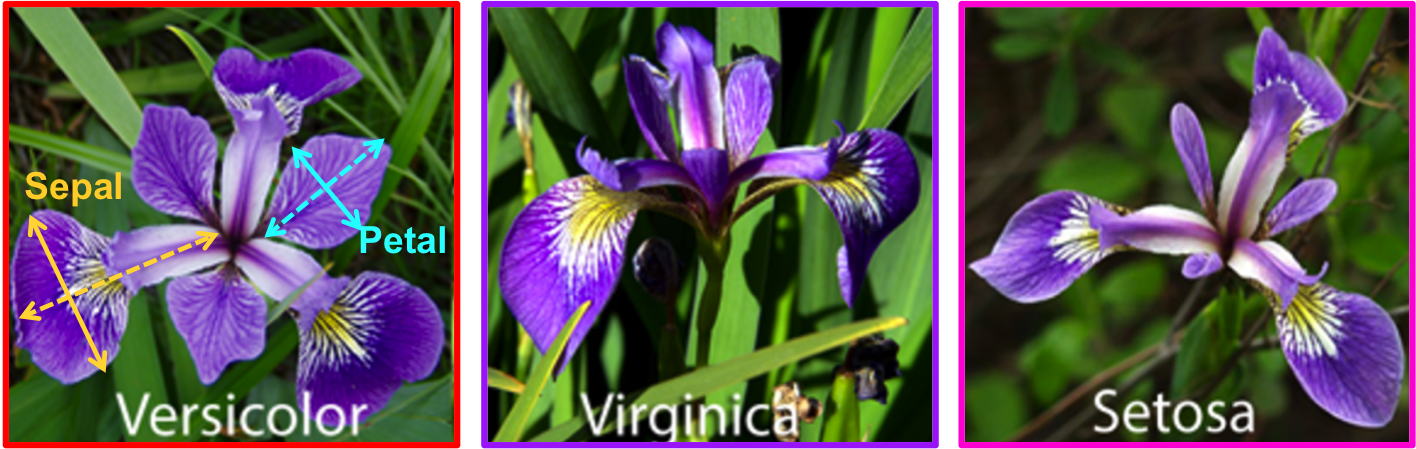

![iris2.png](iris2.png)
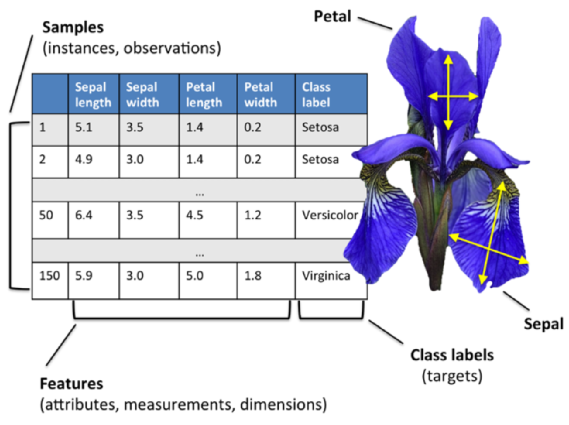

## Data Aquisition and Formating

In [1]:
# Load built-in dataset
from sklearn.datasets import load_iris
iris = load_iris()

In [2]:
# iris is an object (bunch) result of load_iris call function from sklearn.
type(iris) 

sklearn.utils.Bunch

The object has properties where you can access its atributes.

In [3]:
print("Feature Vector Names: ",iris.feature_names)

Feature Vector Names:  ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']


In [4]:
print("Feature Vector Data:")
print(iris.data)

Feature Vector Data:
[[5.1 3.5 1.4 0.2]
 [4.9 3.  1.4 0.2]
 [4.7 3.2 1.3 0.2]
 [4.6 3.1 1.5 0.2]
 [5.  3.6 1.4 0.2]
 [5.4 3.9 1.7 0.4]
 [4.6 3.4 1.4 0.3]
 [5.  3.4 1.5 0.2]
 [4.4 2.9 1.4 0.2]
 [4.9 3.1 1.5 0.1]
 [5.4 3.7 1.5 0.2]
 [4.8 3.4 1.6 0.2]
 [4.8 3.  1.4 0.1]
 [4.3 3.  1.1 0.1]
 [5.8 4.  1.2 0.2]
 [5.7 4.4 1.5 0.4]
 [5.4 3.9 1.3 0.4]
 [5.1 3.5 1.4 0.3]
 [5.7 3.8 1.7 0.3]
 [5.1 3.8 1.5 0.3]
 [5.4 3.4 1.7 0.2]
 [5.1 3.7 1.5 0.4]
 [4.6 3.6 1.  0.2]
 [5.1 3.3 1.7 0.5]
 [4.8 3.4 1.9 0.2]
 [5.  3.  1.6 0.2]
 [5.  3.4 1.6 0.4]
 [5.2 3.5 1.5 0.2]
 [5.2 3.4 1.4 0.2]
 [4.7 3.2 1.6 0.2]
 [4.8 3.1 1.6 0.2]
 [5.4 3.4 1.5 0.4]
 [5.2 4.1 1.5 0.1]
 [5.5 4.2 1.4 0.2]
 [4.9 3.1 1.5 0.2]
 [5.  3.2 1.2 0.2]
 [5.5 3.5 1.3 0.2]
 [4.9 3.6 1.4 0.1]
 [4.4 3.  1.3 0.2]
 [5.1 3.4 1.5 0.2]
 [5.  3.5 1.3 0.3]
 [4.5 2.3 1.3 0.3]
 [4.4 3.2 1.3 0.2]
 [5.  3.5 1.6 0.6]
 [5.1 3.8 1.9 0.4]
 [4.8 3.  1.4 0.3]
 [5.1 3.8 1.6 0.2]
 [4.6 3.2 1.4 0.2]
 [5.3 3.7 1.5 0.2]
 [5.  3.3 1.4 0.2]
 [7.  3.2 4.7 1.4]
 [6.4 3.2 

In [5]:
print("Label Names: ", iris.target_names)

Label Names:  ['setosa' 'versicolor' 'virginica']


In [19]:
# Numerically : setosa = zero, versicolor = 1, and virginica = 2.
print("Label Data:")
iris.target

Label Data:


array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2,
       2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2])

Let's work with Pandas Dataframe from now on....

In [7]:
# Importing Libraries
import pandas as pd

In [8]:
# Let's extract features data assigning to X and labels data assigning to Y. >> X,y
X = pd.DataFrame(iris.data[:, :], columns = iris.feature_names[:])
y = pd.DataFrame(iris.target, columns =["Species"])

In [9]:
print(X)

     sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)
0                  5.1               3.5                1.4               0.2
1                  4.9               3.0                1.4               0.2
2                  4.7               3.2                1.3               0.2
3                  4.6               3.1                1.5               0.2
4                  5.0               3.6                1.4               0.2
..                 ...               ...                ...               ...
145                6.7               3.0                5.2               2.3
146                6.3               2.5                5.0               1.9
147                6.5               3.0                5.2               2.0
148                6.2               3.4                5.4               2.3
149                5.9               3.0                5.1               1.8

[150 rows x 4 columns]


In [10]:
print(y)

     Species
0          0
1          0
2          0
3          0
4          0
..       ...
145        2
146        2
147        2
148        2
149        2

[150 rows x 1 columns]


In [11]:
import sweetviz as sv

Convert bunch-object to pandas dataframe

In [12]:
import numpy as np
data = np.c_[iris.data, iris.target]
columns = np.append(iris.feature_names, ["target"])
iris_df = pd.DataFrame(data, columns=columns)

In [13]:
display(iris_df)

sepal length (cm)  sepal width (cm)  petal length (cm)  petal width (cm)  \
0                  5.1               3.5                1.4               0.2   
1                  4.9               3.0                1.4               0.2   
2                  4.7               3.2                1.3               0.2   
3                  4.6               3.1                1.5               0.2   
4                  5.0               3.6                1.4               0.2   
..                 ...               ...                ...               ...   
145                6.7               3.0                5.2               2.3   
146                6.3               2.5                5.0               1.9   
147                6.5               3.0                5.2               2.0   
148                6.2               3.4                5.4               2.3   
149                5.9               3.0                5.1               1.8   

     target  
0       0.0  
1       0.0  
2       0.0  
3       0.0  
4       0.0  
..      ...  
145     2.0  
146     2.0  
147     2.0  
148     2.0  
149     2.0  

[150 rows x 5 columns]

## EDA : Exploratory Data Analysis

In [14]:
iris_report = sv.analyze(iris_df)

Done! Use 'show' commands to display/save.   |██████████| [100%]   00:00 -> (00:00 left)


In [15]:
iris_report.show_html()

Report SWEETVIZ_REPORT.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


In [16]:
visualizable_feature_names = iris_df.columns[0: -1] ##### equal to ##### events_df.columns[1: 11]
num_visualizable_features = len(visualizable_feature_names)

In [17]:
labels = iris_df['target'].unique()

In [18]:
import plotly.graph_objects as go

fig_hist = []
for i, feature_name in enumerate(visualizable_feature_names):
    fig_hist.append(go.Figure())
    for label in labels:
        fig_hist[i].add_trace(go.Histogram(x=iris_df[iris_df["target"]==label][feature_name], name=label))
    fig_hist[i].update_layout(height=400, width=800, title_text=feature_name)
    fig_hist[i].update_layout(barmode='overlay')
    fig_hist[i].update_traces(opacity=0.5)
    fig_hist[i].show()

ModuleNotFoundError: No module named 'plotly'

[73211:73211:1024/000621.942484:ERROR:vaapi_wrapper.cc(1073)] vaQuerySurfaceAttributes failed, VA error: invalid parameter
[73211:73211:1024/000621.942604:ERROR:vaapi_wrapper.cc(1020)] FillProfileInfo_Locked failed for va_profile VAProfileH264Main and entrypoint VAEntrypointVLD
[73211:73211:1024/000621.942670:ERROR:vaapi_wrapper.cc(1073)] vaQuerySurfaceAttributes failed, VA error: invalid parameter
[73211:73211:1024/000621.942722:ERROR:vaapi_wrapper.cc(1020)] FillProfileInfo_Locked failed for va_profile VAProfileH264High and entrypoint VAEntrypointVLD


Opening in existing browser session.


In [ ]:
fig_scatmat = go.Figure(data=go.Splom(
                        dimensions=[dict(label=feature, values=iris_df[feature]) \
                                    for feature in visualizable_feature_names], \
                        text=iris_df['target'],
                        marker=dict(color=y, showscale=False, line_color='white', line_width=0.5)))

fig_scatmat.update_layout(title='Pairwise feature scatter plots', \
                  width=400 * num_visualizable_features, \
                  height=400 * num_visualizable_features)

fig_scatmat.show()

From inspection (Feature selection):
- All features are important and independent. 

## Scikit-Learn Framework

The framework (Scikit-Learn) use an approach of 4 steps

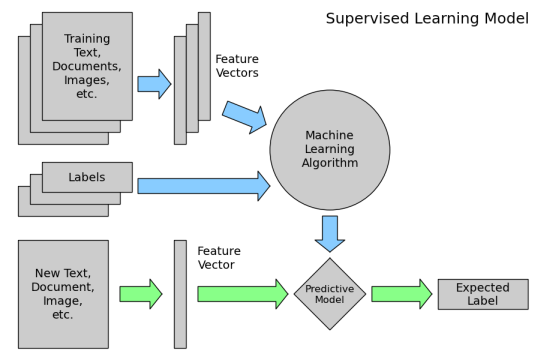

||
Feature (Vector, Labels) = X,y ||
Classifier             = C   ||
Training               = "fit" ||
Forecast               = "predict" ||

Note: In the development below <b>we will NOT slipt</b> the dataset. All entries will be used for training purpose.

DEVELOPMENT #1 [ START ] - ------------------------------------------------------------------------------------

In [ ]:
from sklearn.tree import DecisionTreeClassifier

In [ ]:
# Defining and fitting a DecisionTreeClassifier instance
tree1 = DecisionTreeClassifier()
tree1.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

Let's use a graph library to show the Tree built visually

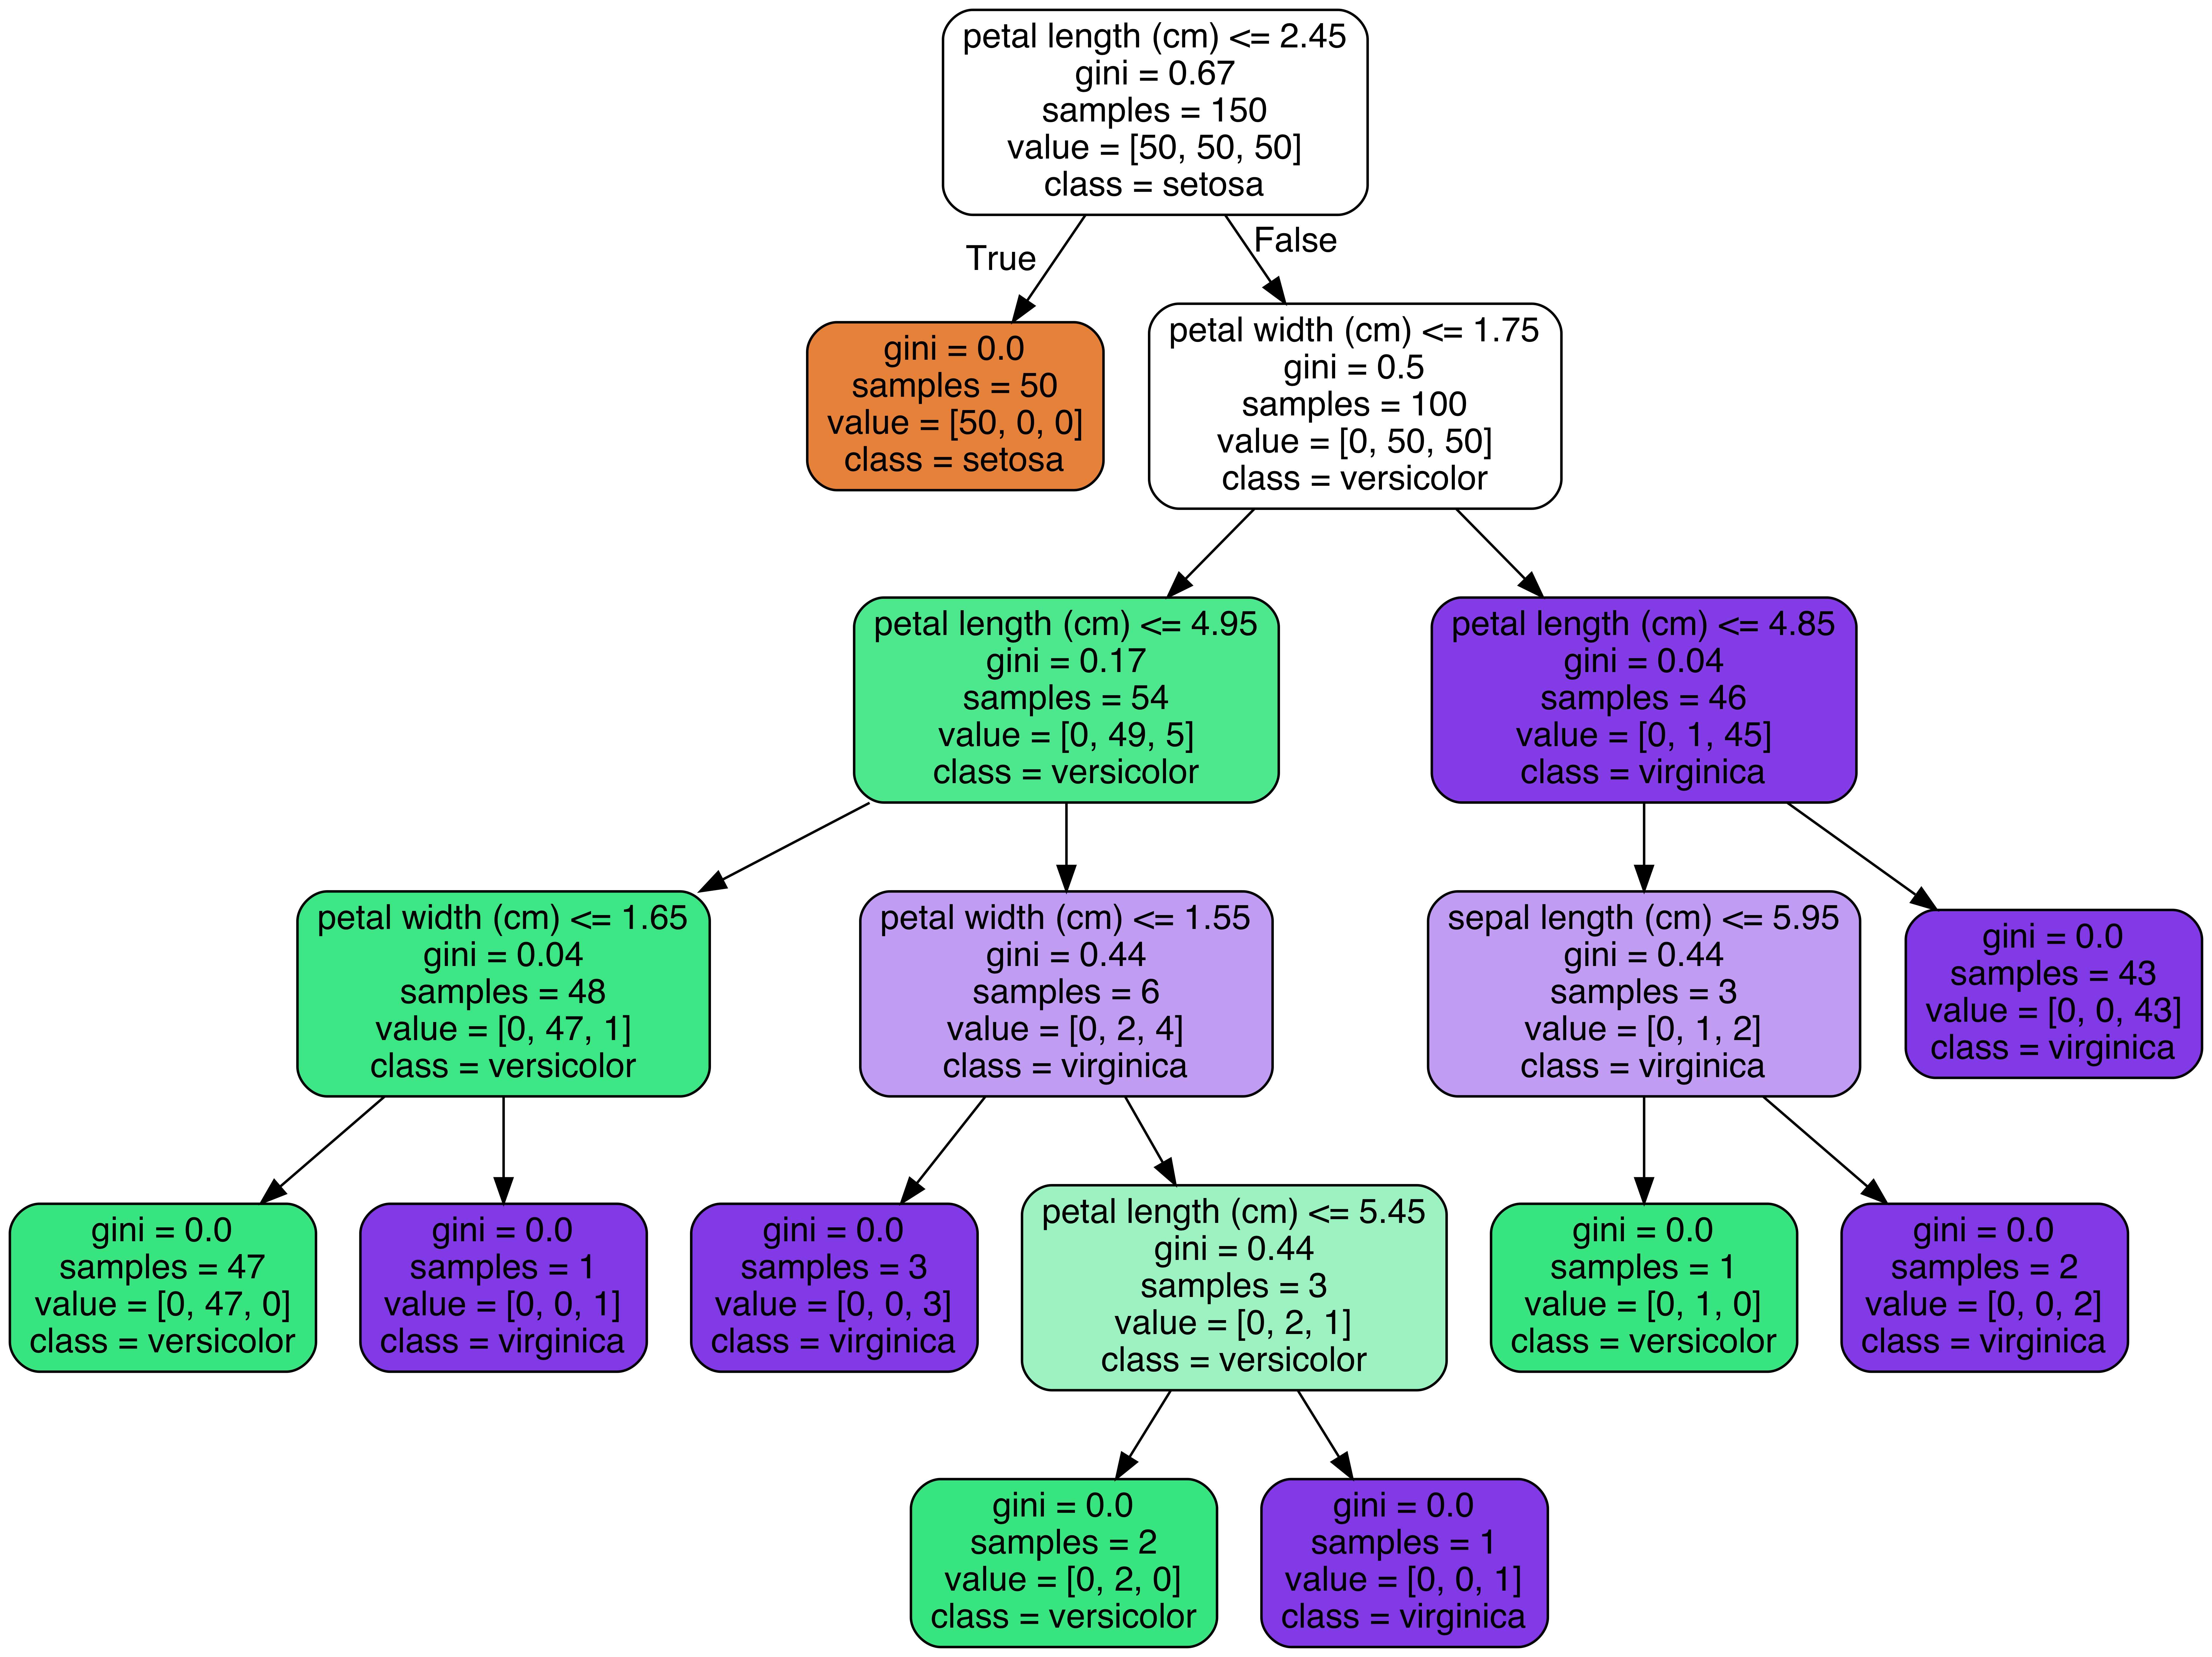

In [ ]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(tree1, out_file='tree1.dot', 
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree1.dot', '-o', 'tree1.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree1.png')

There you go ... <b>our Decision Tree</b> or our <b>classifier</b> with depth = 5 !!! Note: For now we didn't apply any parameter to optimize(max_depth, ...).

Nodes :  white ||
Leaves : orange, green, and purple ||

The lighter the colour the less pure the node is, for example a white box(that is the lightest box) in the tree means that the gini index is high(>0.7 for example), It’s not related with the depth.
Also, every class has an unique color, so we even can differentiate them without looking at the labels just with the color and how light the box is.

You can see that each box contains several characteristics. Let’s start by describing the content of the top most node, most commonly referred to as the root node. The root node is at a depth of zero. A node is a point along the decision tree where a question is asked. This action divides the data into smaller subsets.

<h1>Summary</h1>

<b> petal length (cm) < =2.45:</b>
    The first question the decision tree ask is if the petal length is less than 2.45. 
Based on the result, it either follows the true or the false path.

<b> gini = 0.667:</b> The gini score is a metric that quantifies the purity of the node/leaf. A gini score greater than zero implies that samples contained within that node belong to different classes. A gini score of zero means that the node is pure, that within that node only a single class of samples exist. Notice that we have a gini score greater than zero; therefore, we know that the samples contained within the root node belong to different classes.

<b>samples = 150:</b> Since the iris flower data set contains 150 samples, this value is set to 150.

<b>value = [50, 50, 50]:</b> The value list tells you how many samples at the given node fall into each category. The first element of the list shows the number of samples that belong to the setosa class, the second element of the list shows the number of samples that belong to the versicolor class, and the third element in the list shows the number of samples that belong to the virginica class. Notice how this node is not a pure one since different types of classes are contained within the same node. We knew this already from the gini score, but it’s nice to actually see it.


<b>class = setosa:</b> The class value shows the prediction a given node will make and it can be determined from the value list. Whichever class occurs the most within the node will be selected as the class value. If the decision tree were to end at the root node, it would predict that all 150 samples belonged to the setosa class. Of course this makes no sense, since there is an equal number of samples for each class. It seems to me that the decision tree is programmed to choose the first class on the list if there is an equal number of samples for each class.

Understanding How a Tree Makes a Split :

To determine which feature to use to make the first split — that is, to make the root node — the algorithm chooses a feature and makes a split. It then looks at the subsets and measures their impurity using the gini score. It does this for multiple thresholds and determines that the best split for the given feature is the one that produces the purest subsets. This is repeated for all the features in the training set. Ultimately, the root node is determined by the feature that produces a split with purest subsets. Once the root node is decided, the tree is grown to a depth of one. The same process is repeated for the other nodes in the tree.

Is that clear now why DT usually will <b>overfitting ???</b>

A fully grown Decision Tree: In the tree shown above, none of the parameters were set. The tree grows to a fully to a depth of five. There are eight nodes and nine leaves. Not limiting the growth of a decision tree <b>may lead</b> to over-fitting.

# Make a Prediction

Now that we know how our decision tree works, let us make predictions. The input should be in a list and ordered as [sepal length, sepal width, petal length, petal width]

In [ ]:
# Operational Data :
sample_one_pred_tree1 = int(tree1.predict([[5, 5, 1, 3]]))
sample_two_pred_tree1 = int(tree1.predict([[5, 5, 2.6, 1.5]]))
print(f" TREE1 sample_one most likely belongs a {iris.target_names[sample_one_pred_tree1]} flower.")
print(f" TREE1 sample_two most likely belongs a {iris.target_names[sample_two_pred_tree1]} flower.")

 TREE1 sample_one most likely belongs a setosa flower.
 TREE1 sample_two most likely belongs a versicolor flower.


# Decision Tree Parameters

If you take a look at the parameters the DecisionTreeClassifier can take, you might be surprised so, let’s look at some of them.

<b>criterion</b> : This parameter determines how the impurity of a split will be measured. The default value is “gini” but you can also use “entropy” as a metric for impurity.

<b>splitter</b>: This is how the decision tree searches the features for a split. The default value is set to “best”. That is, for each node, the algorithm considers all the features and chooses the best split. If you decide to set the splitter parameter to “random,” then a random subset of features will be considered. The split will then be made by the best feature within the random subset. The size of the random subset is determined by the max_features parameter. <b>This is partly where a Random Forest gets its name</b>.

<b>max_depth</b>: This determines the maximum depth none. This will often result in over-fitted decision trees. The depth parameter is one of the ways in which we can regularize the tree, or limit the way it grows to prevent over-fitting. In Figure-4, you can see what happens if you don’t set the depth of the tree — pure madness!

<b>min_samples_split:</b> The minimum number of samples a node must contain in order to consider splitting. The default value is 2. You can use this parameter to regularize your tree, it is used to control over-fitting.

<b>min_samples_leaf:</b> The minimum number of samples needed to be considered a leaf node. The default value is set to 1. Use this parameter to limit the growth of the tree.

<b>max_features:</b> The number of features to consider when looking for the best split. If this value is not set, the decision tree will consider <b>all features available</b> to make the best split. <b>Depending on your application, it’s often a good idea to tune this parameter</b>.

In [ ]:
# Setting parameters
tree2 = DecisionTreeClassifier(criterion = "entropy", splitter = "random", max_depth = 2,  min_samples_split = 5,
                              min_samples_leaf = 2, max_features = 2)
tree2.fit(X,y)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
                       max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='random')

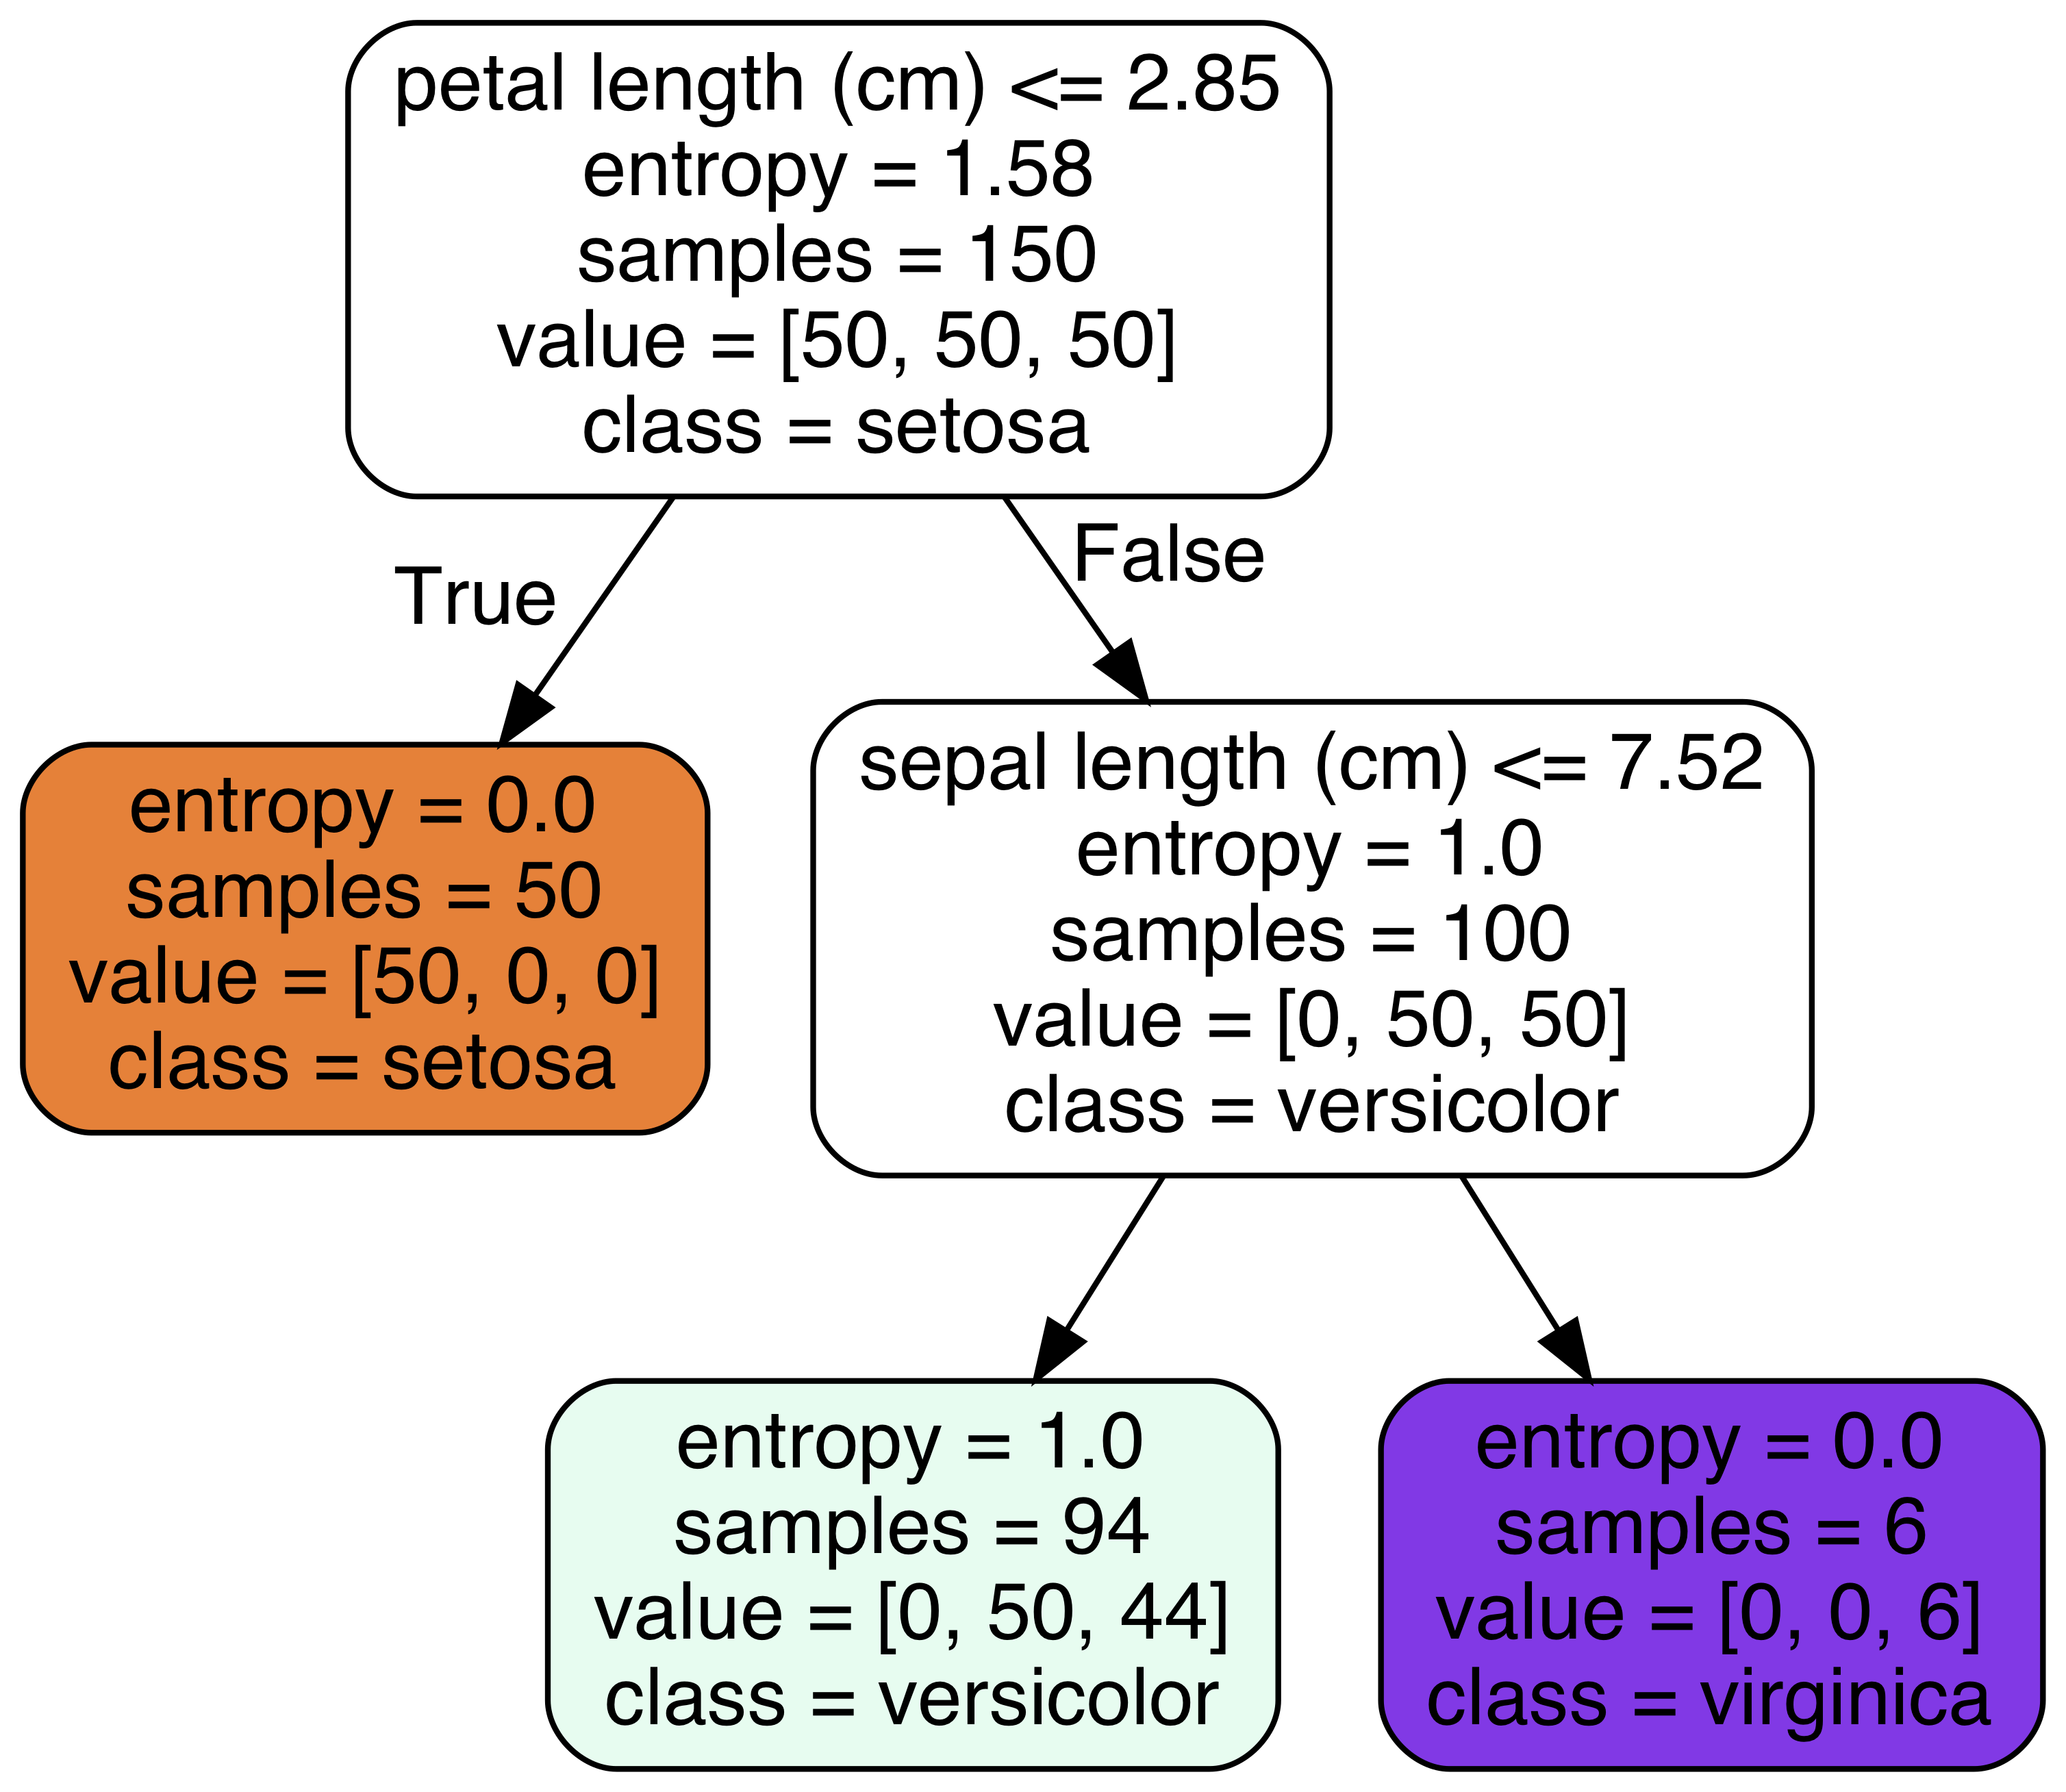

In [ ]:
# Export as dot file
export_graphviz(tree2, out_file='tree2.dot', 
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree2.dot', '-o', 'tree2.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree2.png')

In [ ]:
iris.feature_names

['sepal length (cm)',
 'sepal width (cm)',
 'petal length (cm)',
 'petal width (cm)']

In [ ]:
# Operational Data (sample_one_pred e sample_two_pred) :
sample_one_pred_tree2 = int(tree2.predict([[5, 5, 1, 3]]))
sample_two_pred_tree2 = int(tree2.predict([[5, 5, 2.6, 1.5]]))
print(f" TREE2: sample_one most likely belongs a {iris.target_names[sample_one_pred_tree2]} flower.")
print(f" TREE1  sample_one most likely belongs a {iris.target_names[sample_one_pred_tree1]} flower.")
print(" ")
print(f" TREE2: sample_two most likely belongs a {iris.target_names[sample_two_pred_tree2]} flower.")
print(f" TREE1  sample_two most likely belongs a {iris.target_names[sample_two_pred_tree1]} flower.")

 TREE2: sample_one most likely belongs a setosa flower.
 TREE1  sample_one most likely belongs a setosa flower.
 
 TREE2: sample_two most likely belongs a setosa flower.
 TREE1  sample_two most likely belongs a versicolor flower.


In [ ]:
# New Operational Data (sample_three_pred) :

In [ ]:
sample_three_pred_tree2 = int(tree2.predict([[6, 3, 4, 2]]))

In [ ]:
sample_three_pred_tree1 = int(tree1.predict([[6, 3, 4, 2]]))

In [ ]:
print(f" TREE2: sample_three most likely belongs a {iris.target_names[sample_three_pred_tree2]} flower.")
print(" ")
print(f" TREE1: sample_three most likely belongs a {iris.target_names[sample_three_pred_tree1]} flower.")

 TREE2: sample_three most likely belongs a versicolor flower.
 
 TREE1: sample_three most likely belongs a virginica flower.


DEVELOPMENT #1 [ END ] - ------------------------------------------------------------------------------------

Note: In the development below <b>we WILL slipt</b> the dataset. All entries will be used for training purpose.

DEVELOPMENT #2 [ START ] - ------------------------------------------------------------------------------------

In [ ]:
from sklearn.model_selection import train_test_split
(X_train, X_test, y_train, y_test) = train_test_split(X, y, train_size=0.7, random_state=1)

In [ ]:
X_train.shape #(105 samples)

(105, 4)

In [ ]:
tree3 = DecisionTreeClassifier()
tree3.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

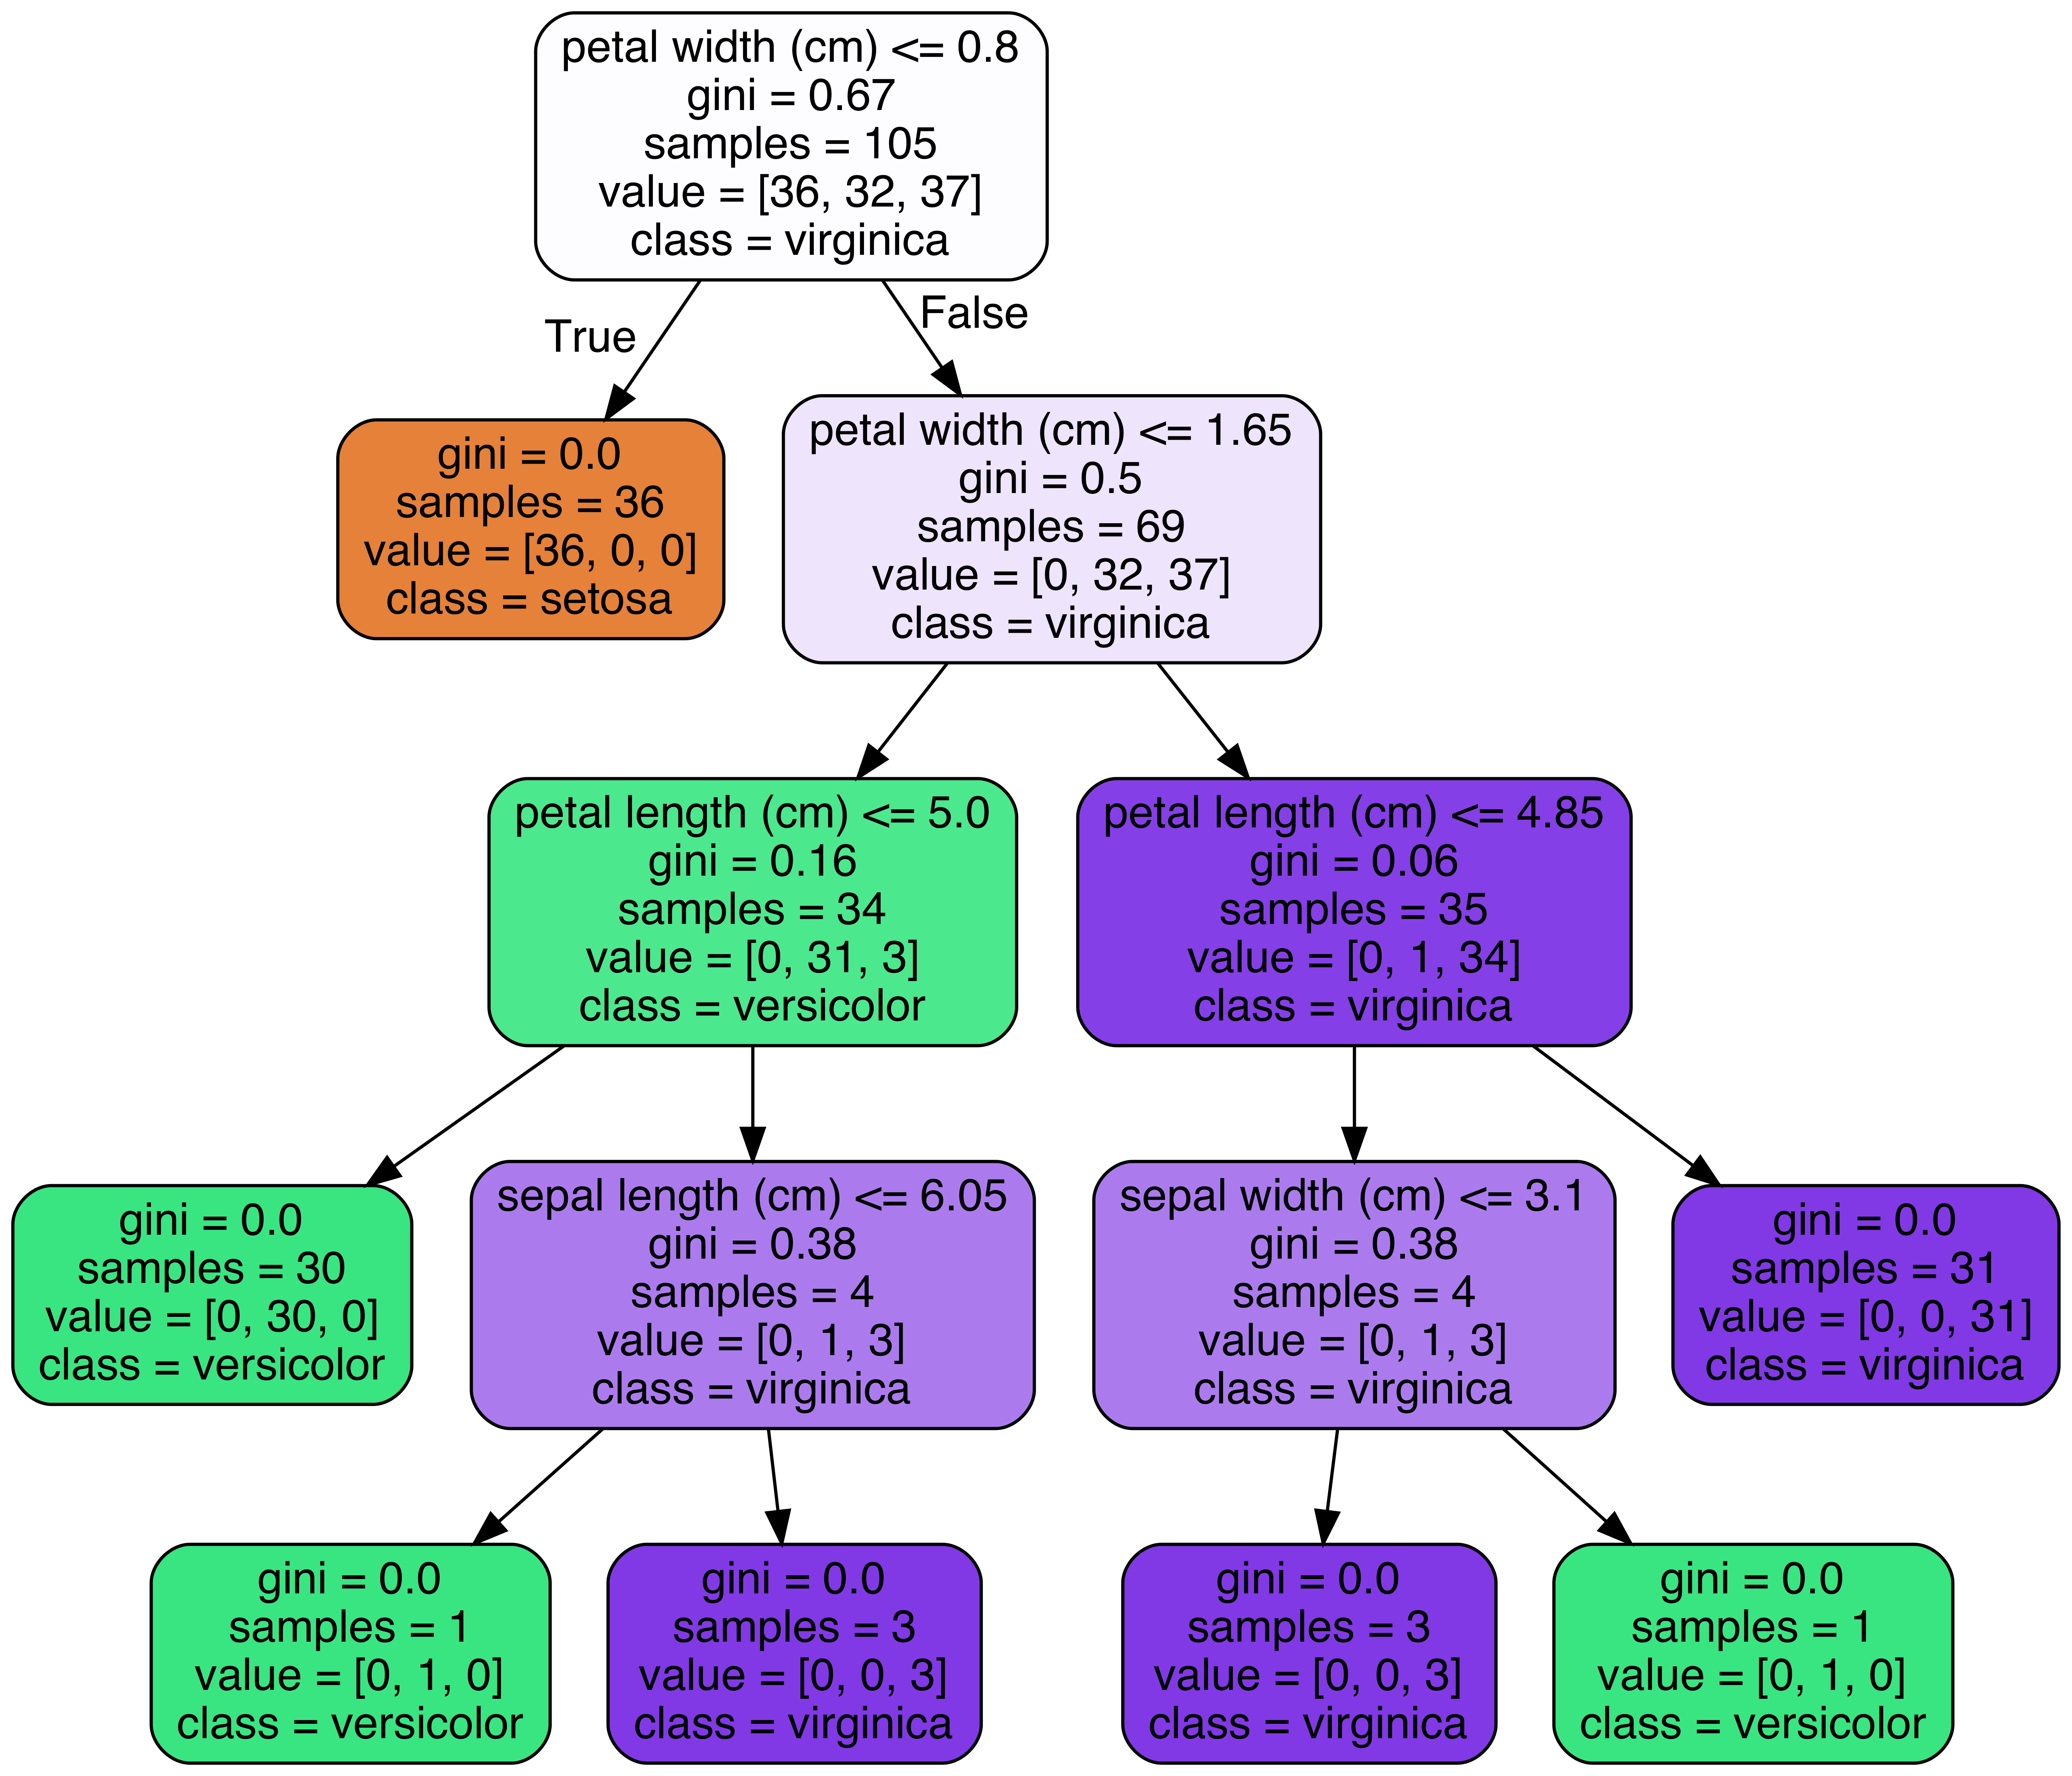

In [ ]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(tree3, out_file='tree3.dot', 
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree3.dot', '-o', 'tree3.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree3.png')

In [ ]:
tree3.score(X_train, y_train)

1.0

In [ ]:
tree3.score(X_test, y_test)

0.9555555555555556

In [ ]:
sample_three_pred_tree3 = int(tree3.predict([[6, 3, 4, 2]]))

In [ ]:
print(f" TREE3: sample_three most likely belongs a {iris.target_names[sample_three_pred_tree3]} flower.")

 TREE3: sample_three most likely belongs a virginica flower.


DEVELOPMENT #2 [ END ] - ------------------------------------------------------------------------------------

Adding all parameters again ...

In [ ]:
tree4 = DecisionTreeClassifier(criterion = "entropy", splitter = "random", max_depth = 2,  min_samples_split = 5,
                              min_samples_leaf = 2, max_features = 2)
tree4.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
                       max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='random')

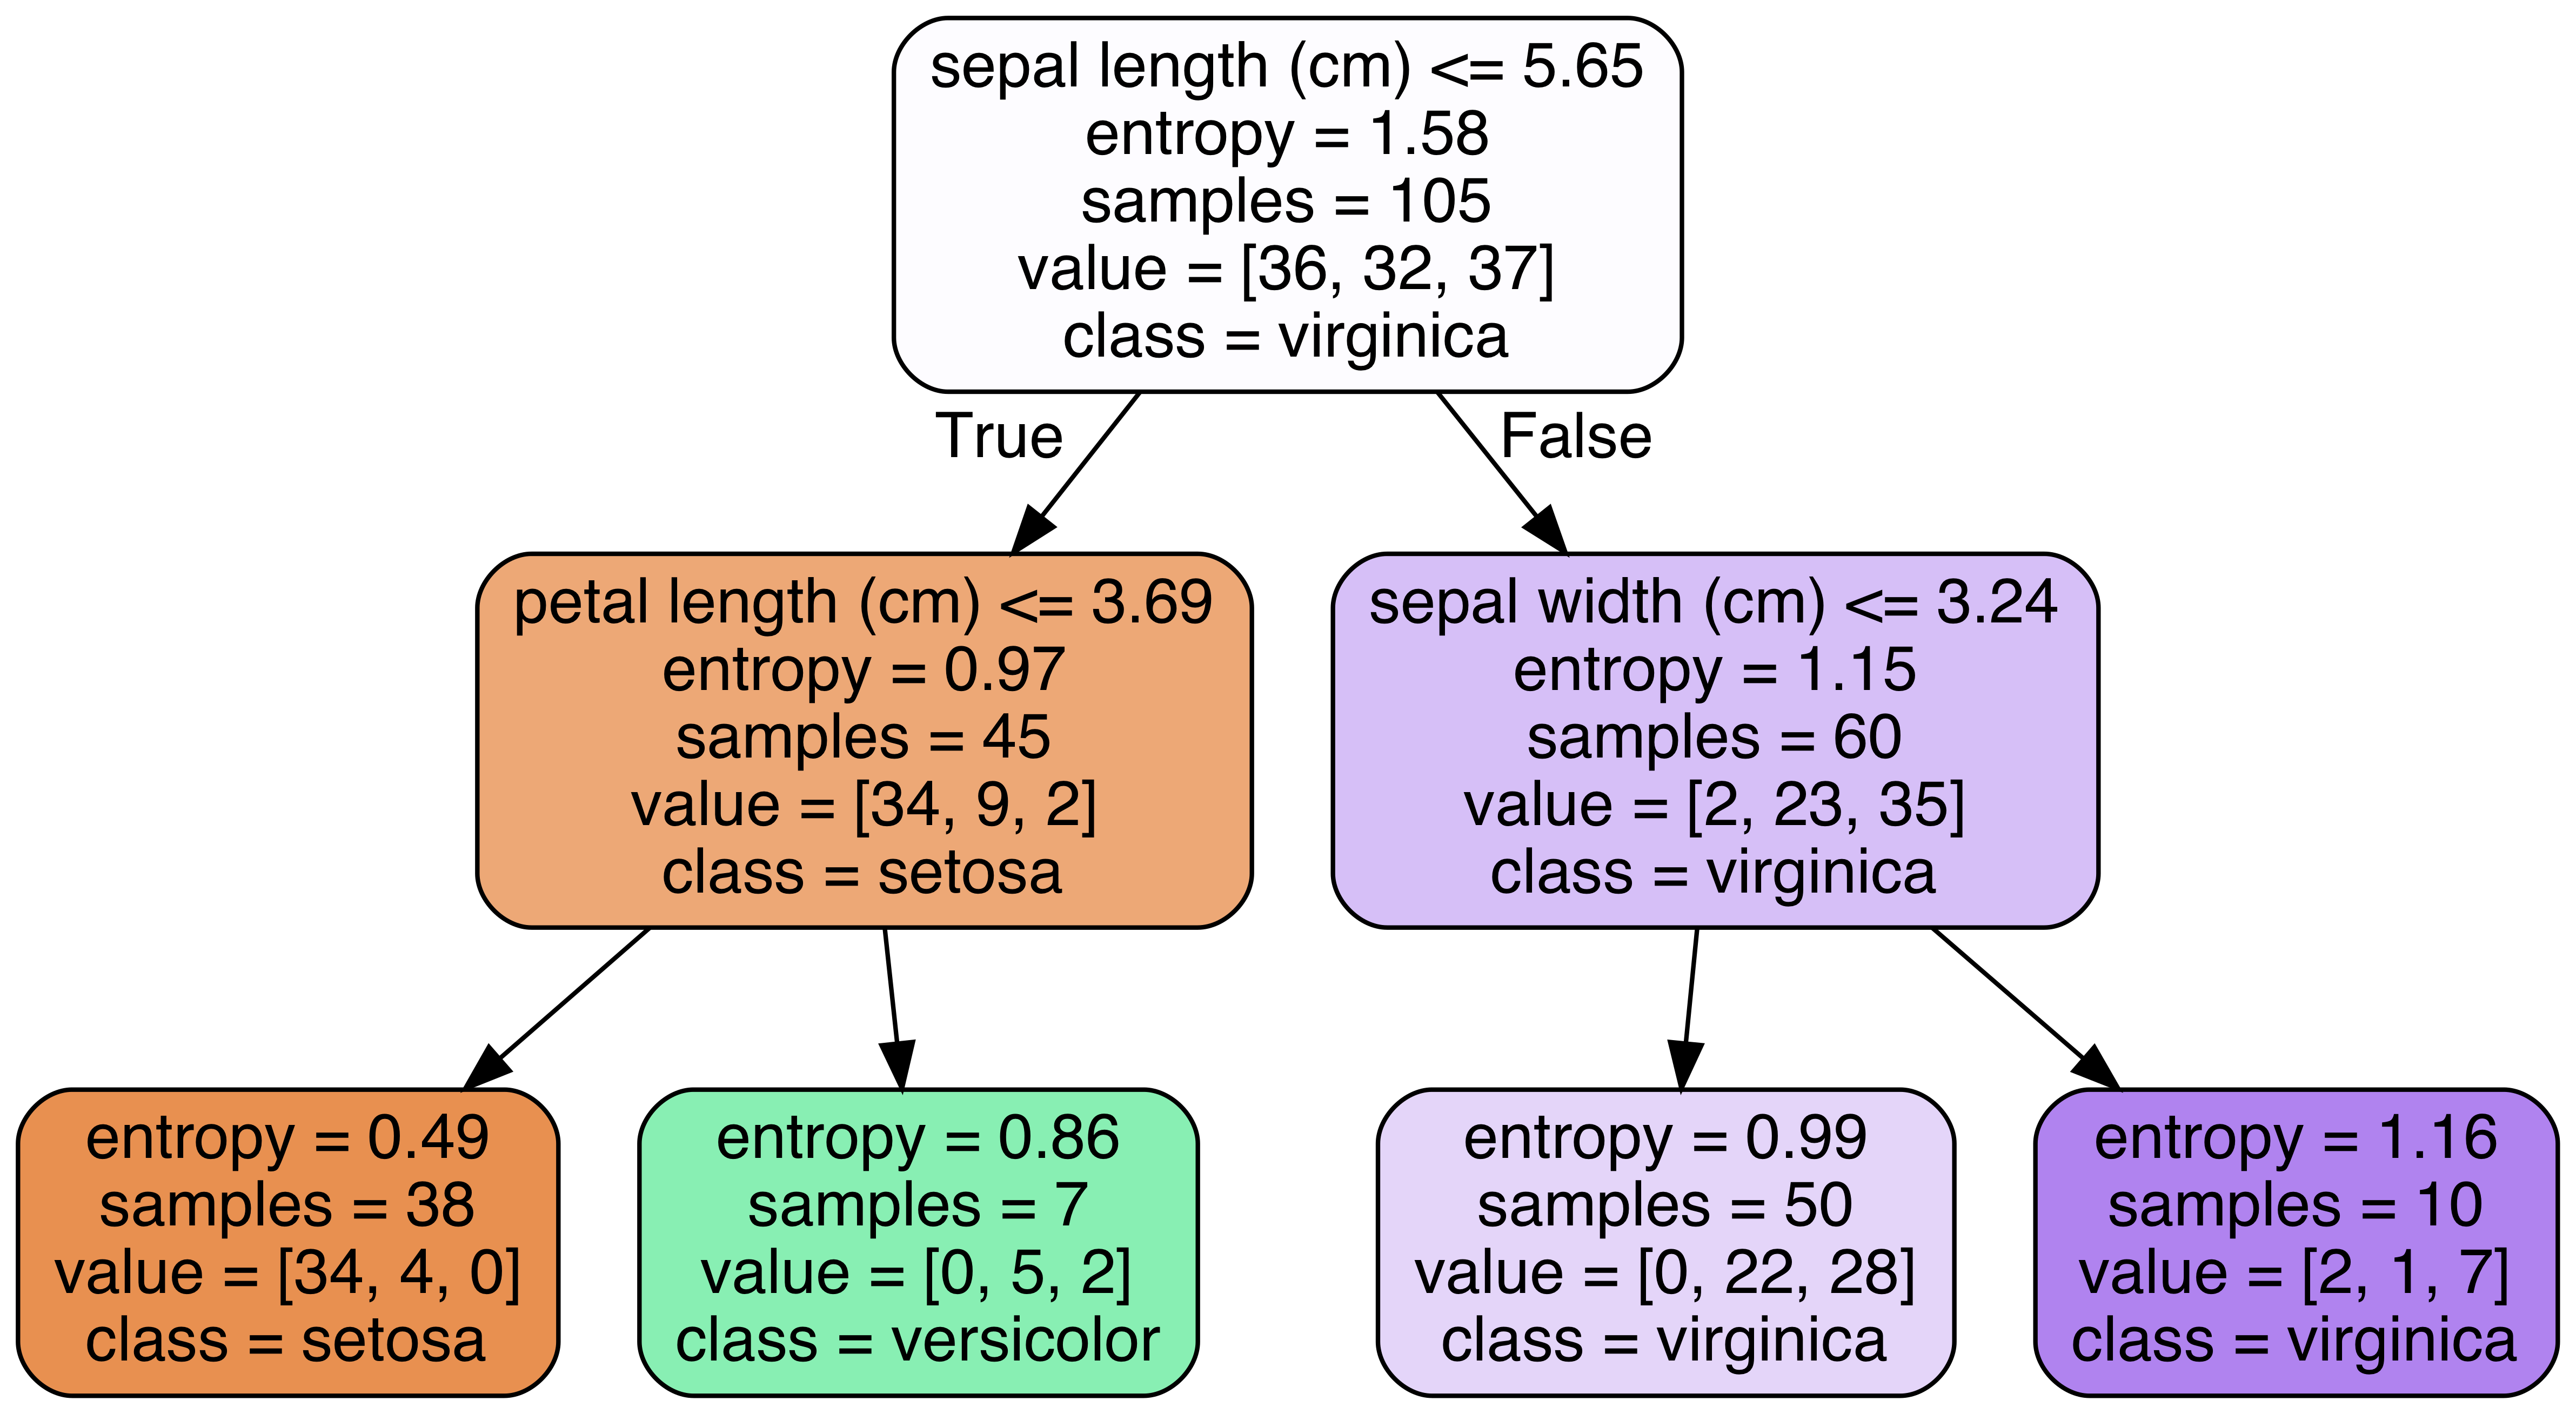

In [ ]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(tree4, out_file='tree4.dot', 
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'tree4.dot', '-o', 'tree4.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'tree4.png')

In [ ]:
tree4.score(X_train, y_train)

0.7047619047619048

In [ ]:
tree4.score(X_test, y_test)

0.7111111111111111

In [ ]:
sample_three_pred_tree4 = int(tree4.predict([[6, 3, 4, 2]]))

In [ ]:
print(f" TREE4: sample_three most likely belongs a {iris.target_names[sample_three_pred_tree4]} flower.")

 TREE4: sample_three most likely belongs a virginica flower.


------------------------

In [ ]:
(X_train, X_vt, y_train, y_vt) = train_test_split(X, y, test_size=0.3, random_state=0) #70% training
(X_validation, X_test, y_validation, y_test) = train_test_split(X_vt, y_vt, test_size=0.5, random_state=0) #15% validation # 15% test

In [ ]:
X_train.shape

(105, 4)

In [ ]:
X_validation.shape

(22, 4)

In [ ]:
X_test.shape

(23, 4)

In [ ]:
dtree = DecisionTreeClassifier()

In [ ]:
dtree.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=None,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

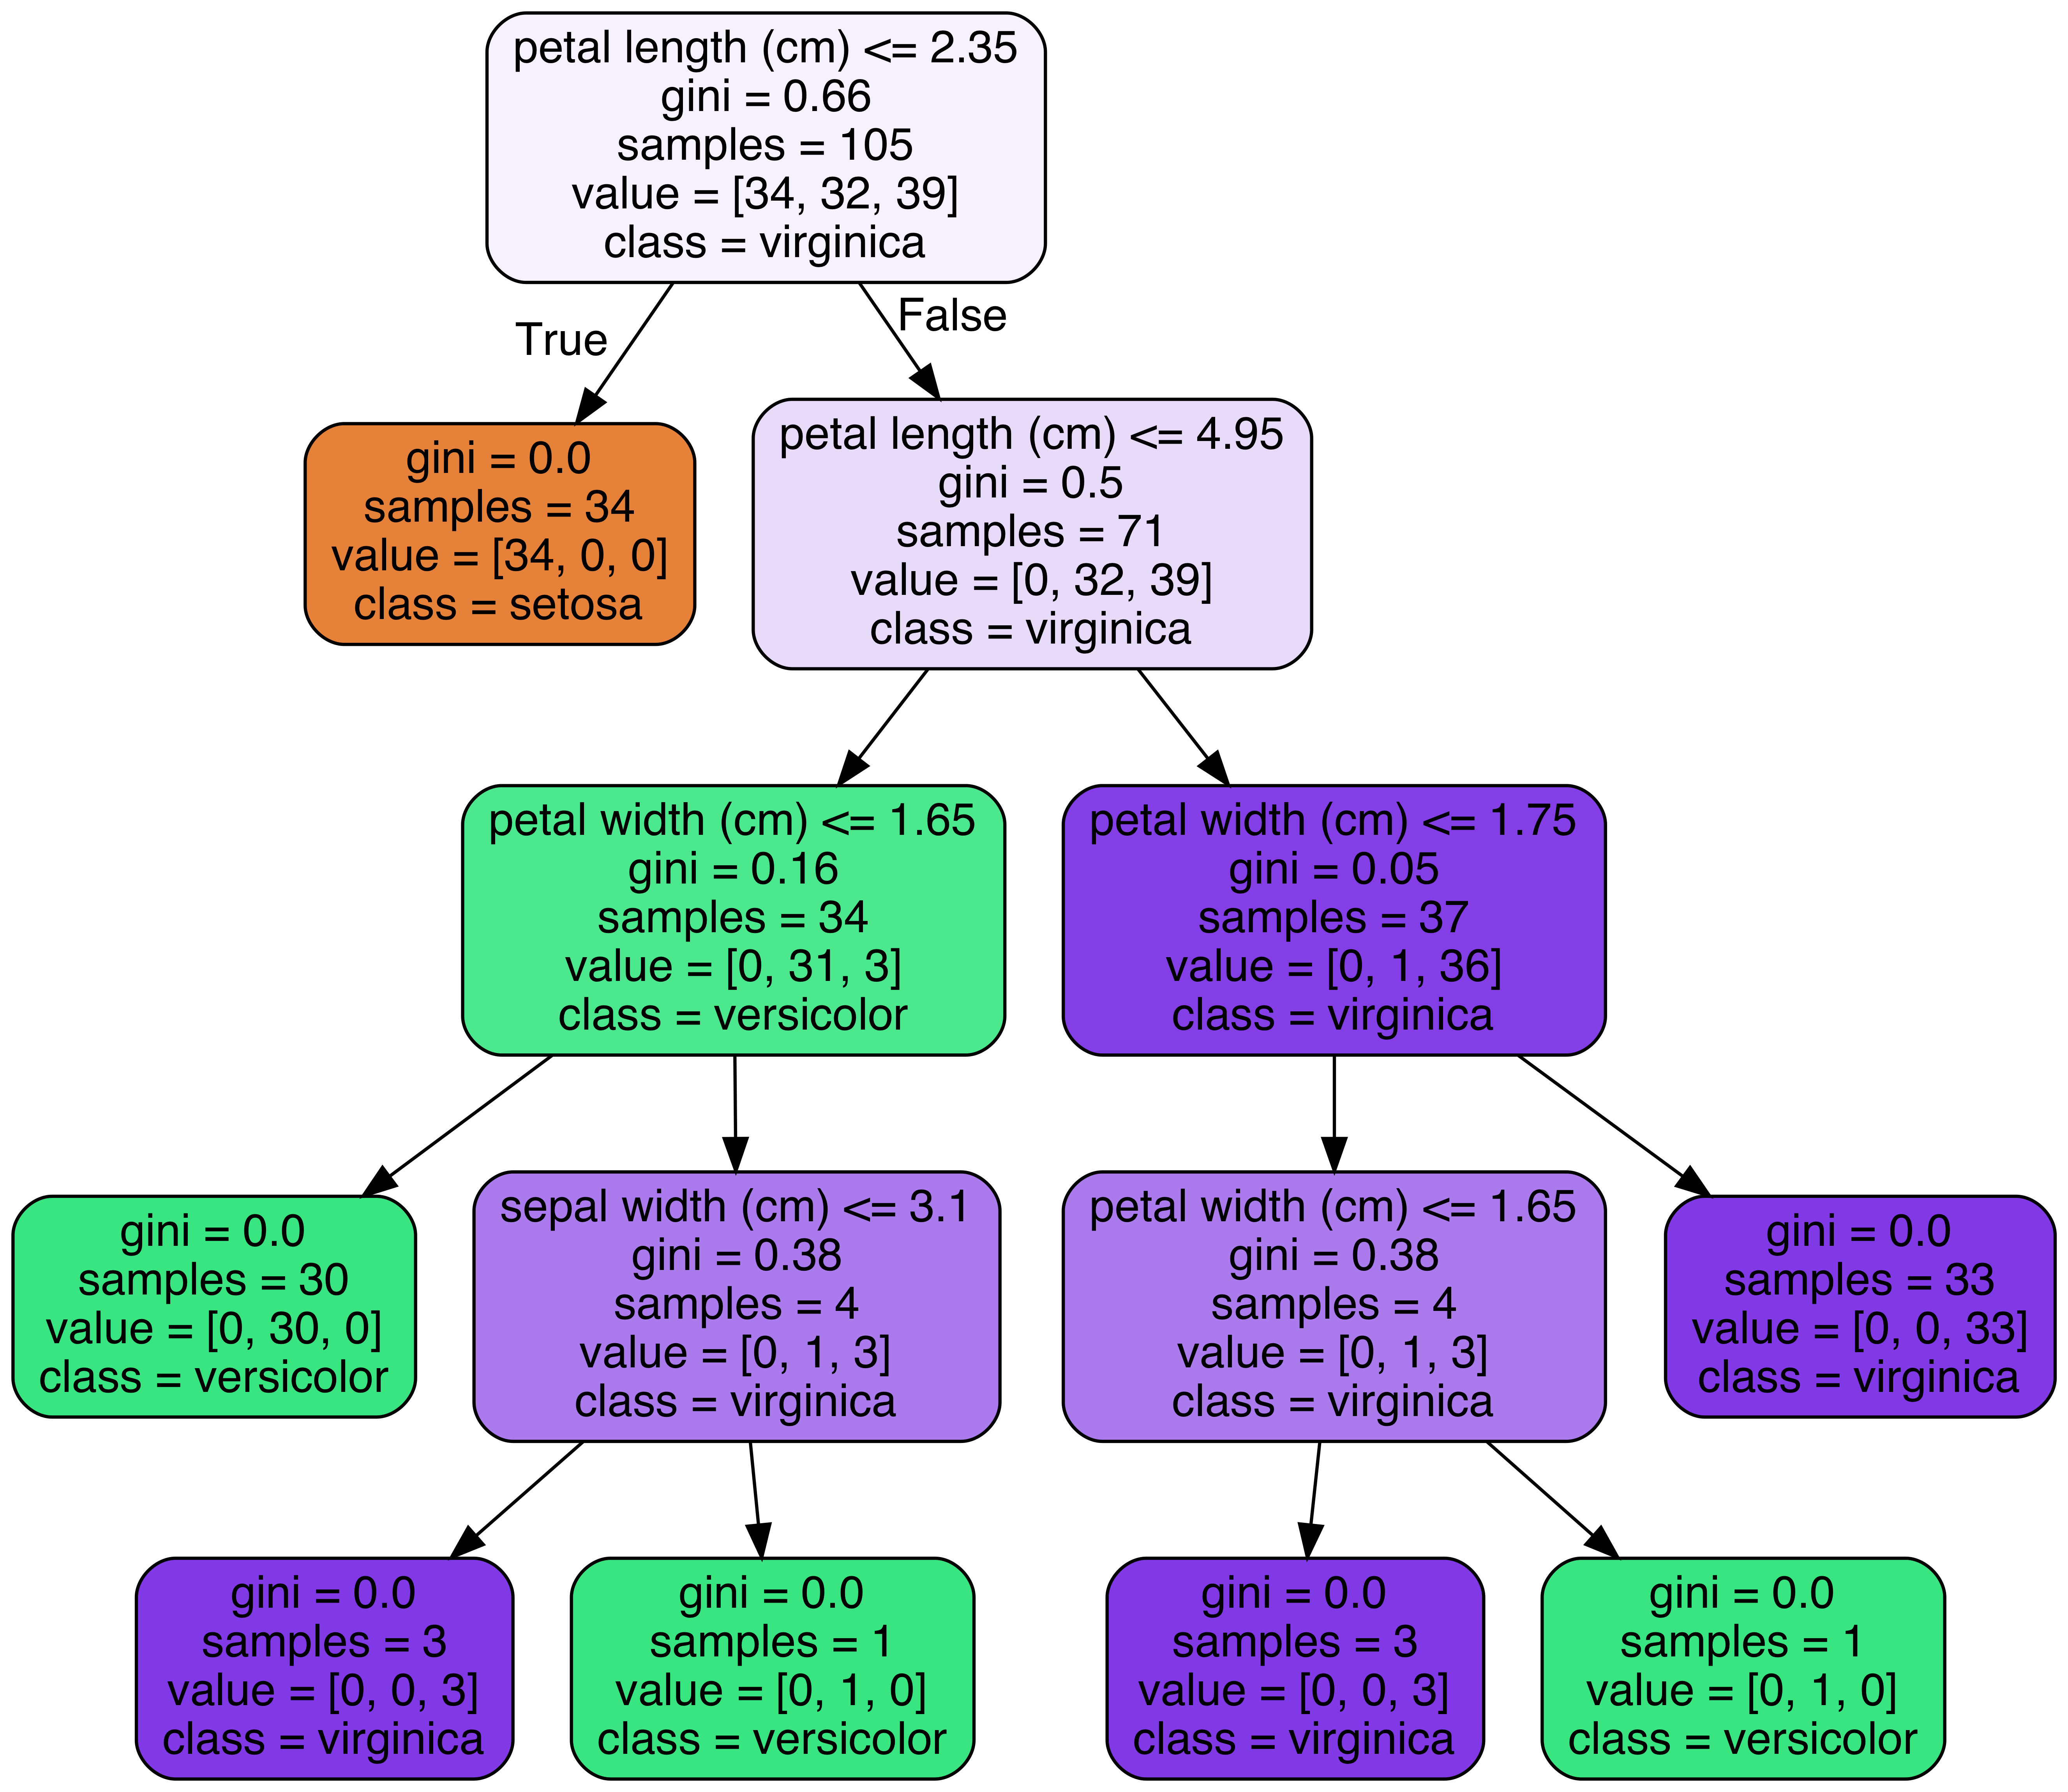

In [ ]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(dtree, out_file='dtree.dot', 
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'dtree.dot', '-o', 'dtree.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'dtree.png')

In [ ]:
dtree.score(X_train, y_train)

1.0

In [ ]:
dtree.score(X_validation, y_validation)

1.0

In [ ]:
dtree.score(X_test, y_test)

0.9565217391304348

In [ ]:
sample_three_pred_dbtree = int(dtree.predict([[6, 3, 4, 2]]))

In [ ]:
print(f" DBTREE: sample_three most likely belongs a {iris.target_names[sample_three_pred_dbtree]} flower.")

 DBTREE: sample_three most likely belongs a virginica flower.


------------------------

In [ ]:
(X_train, X_vt, y_train, y_vt) = train_test_split(X, y, test_size=0.3, random_state=0)
(X_validation, X_test, y_validation, y_test) = train_test_split(X_vt, y_vt, test_size=0.5, random_state=0)

In [ ]:
X_train.shape

(105, 4)

In [ ]:
X_validation.shape

(22, 4)

In [ ]:
X_test.shape

(23, 4)

In [ ]:
dbtree1 = DecisionTreeClassifier(criterion = "entropy", splitter = "random", max_depth = 2,  min_samples_split = 5,
                              min_samples_leaf = 2, max_features = 2)
dbtree1.fit(X_train, y_train)

DecisionTreeClassifier(class_weight=None, criterion='entropy', max_depth=2,
                       max_features=2, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=2, min_samples_split=5,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='random')

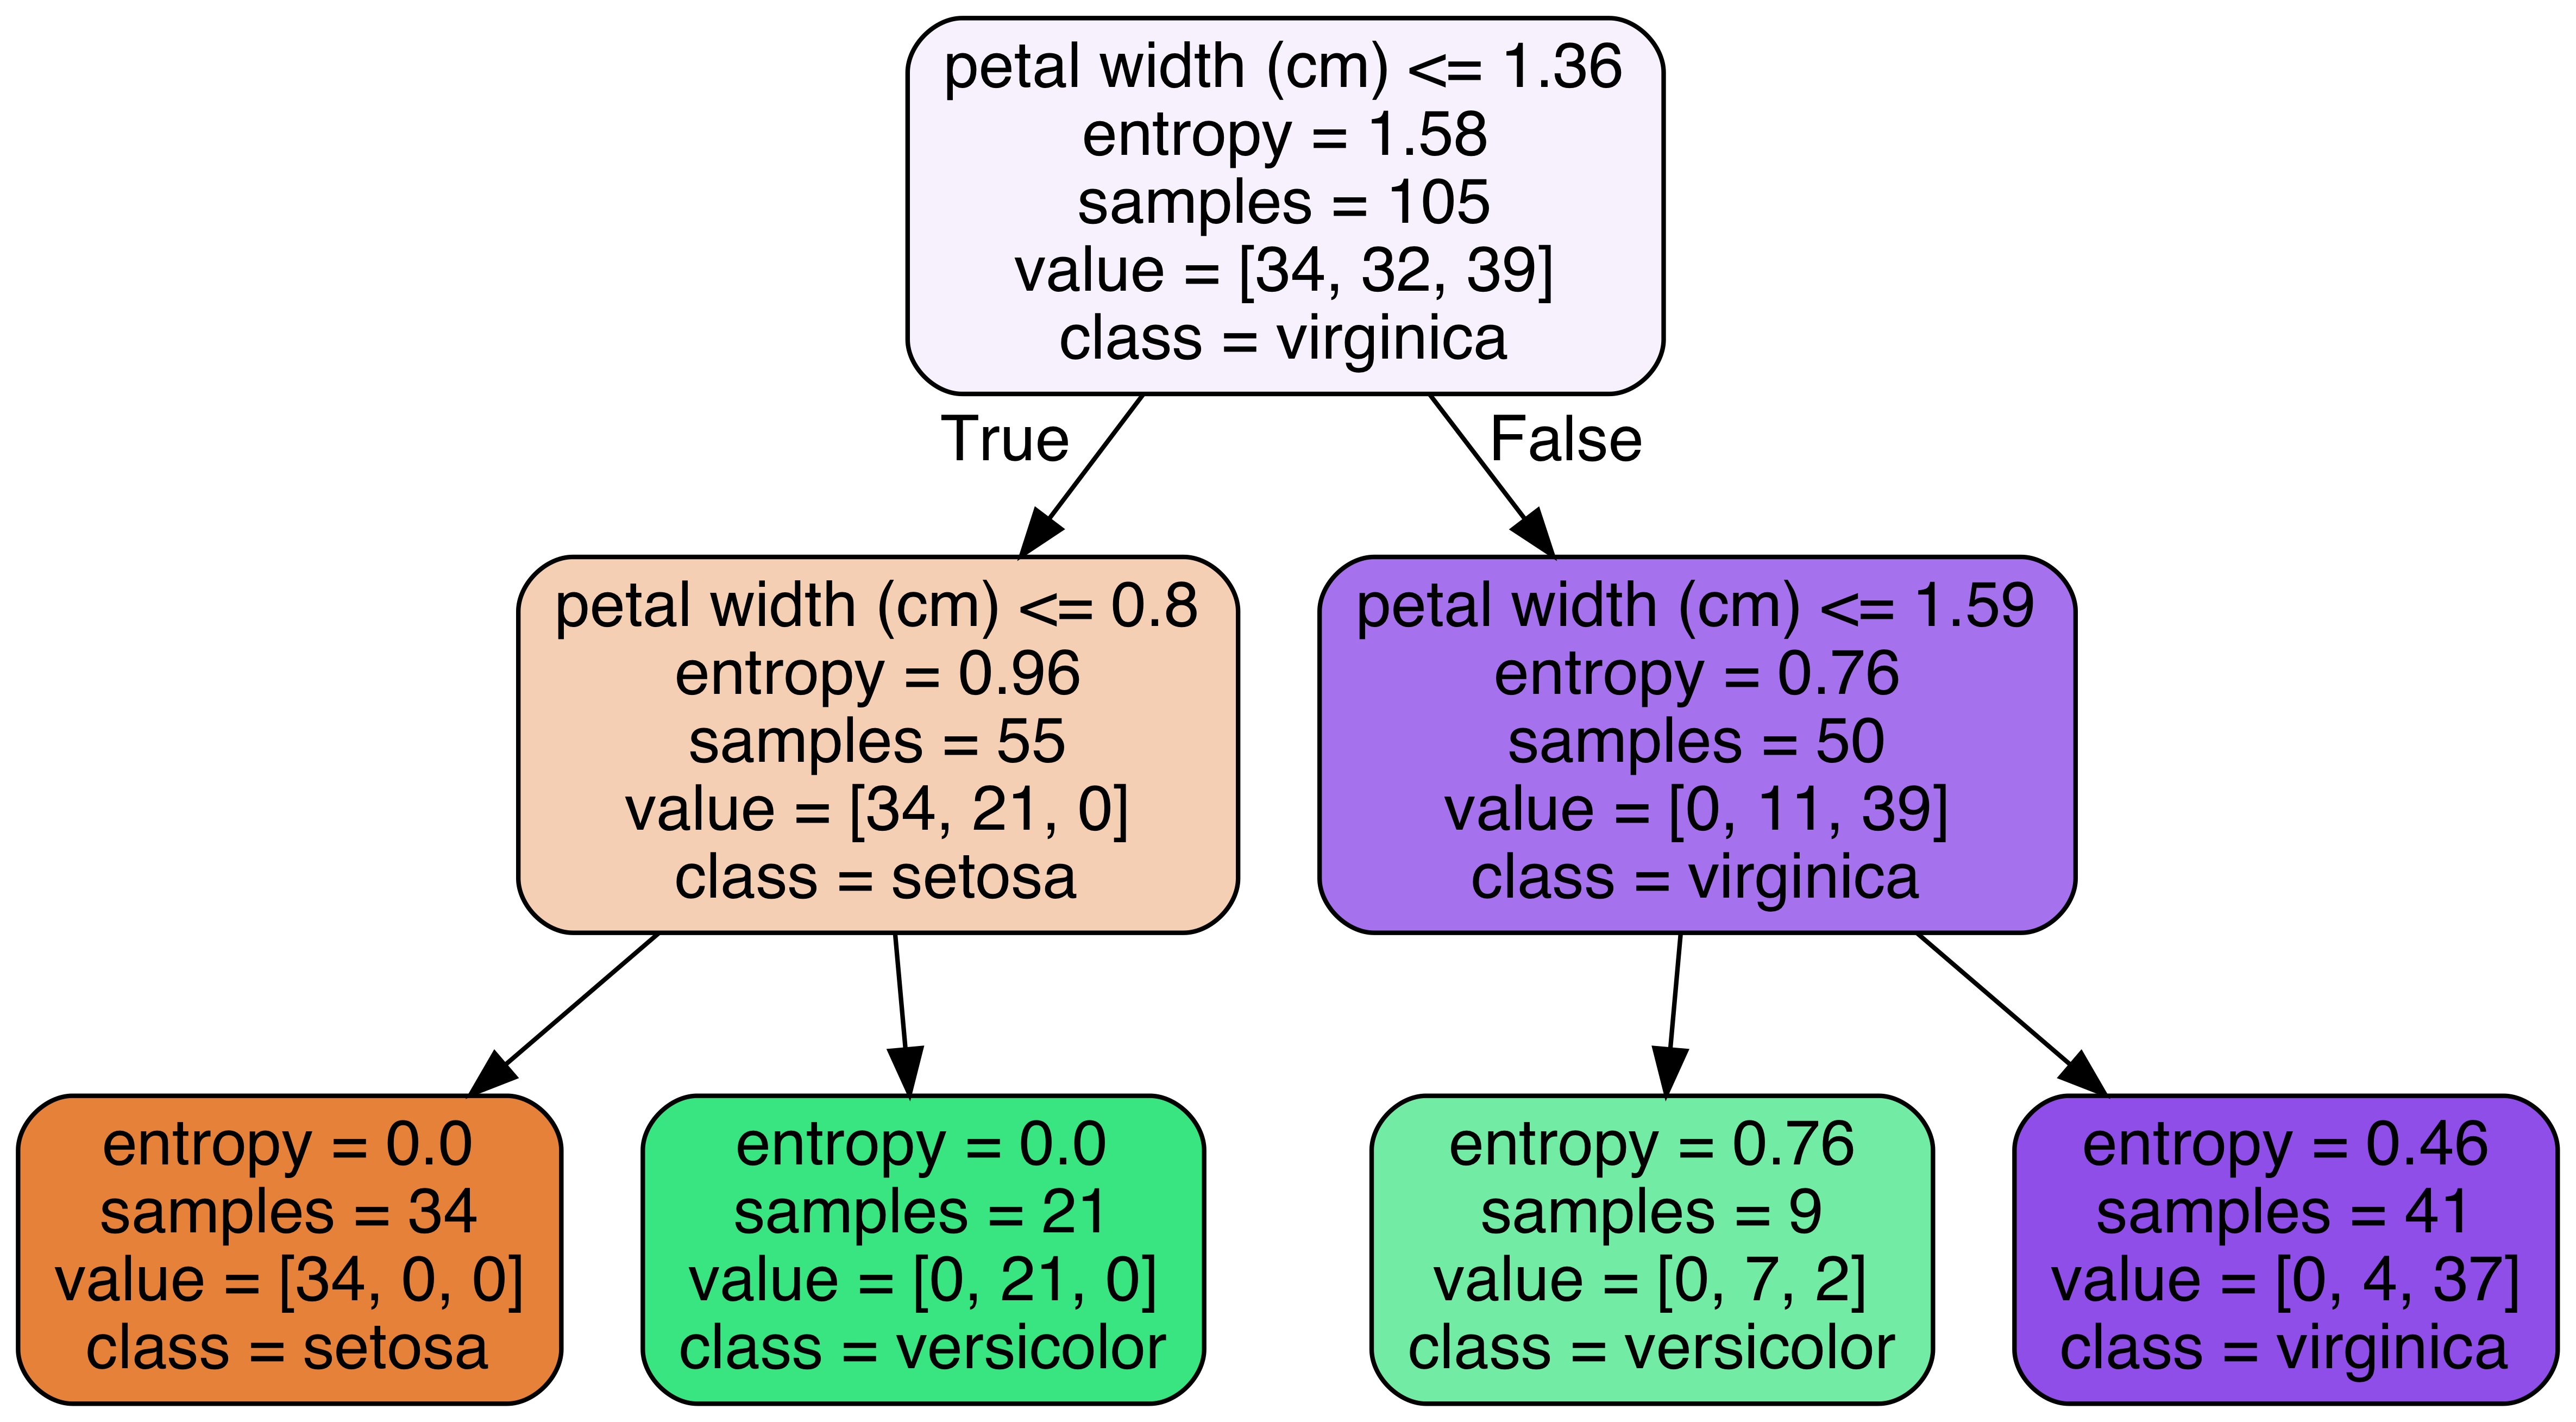

In [ ]:
from sklearn.tree import export_graphviz
# Export as dot file
export_graphviz(dbtree1, out_file='dbtree1.dot', 
                feature_names = iris.feature_names,
                class_names = iris.target_names,
                rounded = True, proportion = False, 
                precision = 2, filled = True)

# Convert to png using system command (requires Graphviz)
from subprocess import call
call(['dot', '-Tpng', 'dbtree1.dot', '-o', 'dbtree1.png', '-Gdpi=600'])

# Display in jupyter notebook
from IPython.display import Image
Image(filename = 'dbtree1.png')

In [ ]:
dbtree1.score(X_train, y_train)

0.9428571428571428

In [ ]:
dbtree1.score(X_validation, y_validation)

1.0

In [ ]:
dbtree1.score(X_test, y_test)

0.9130434782608695

In [ ]:
sample_three_pred_dbtree1 = int(dbtree1.predict([[6, 3, 4, 2]]))

In [ ]:
print(f" DBTREE1: sample_three most likely belongs a {iris.target_names[sample_three_pred_dbtree1]} flower.")

 DBTREE1: sample_three most likely belongs a virginica flower.


Conclusion: DT is a very powerfull model, in this class-code-example example we went beyond the basics regarding DT due to the hyper-parameters use and training, validation and test sets .... BUT the size of the sample in this case (150) is not enought to create a trustable predictor. This is why ... BIG DATA is so important to ML !!!! 